Import Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read data in file

In [3]:
alpha_data=pd.read_csv("median_alpha_power.csv")
gamma_data=pd.read_csv("median_gamma_power.csv")

In [4]:
alpha_data.head()

,Subjects,Group,Condition,Alpha
0,1,CTR,MW,49.809703
1,2,CTR,MW,50.941067
2,3,CTR,MW,44.186021
3,4,CTR,MW,41.357391
4,5,CTR,MW,48.685470


In [5]:
gamma_data.head()

,Subjects,Group,Condition,Gamma_All,Posterior,Frontal,Combined_Post,Combined_Front,Combined_all
0,1,CTR,MW,29.442,28.803828,30.692182,30.3748,31.5519,30.6392
1,2,CTR,MW,26.504,25.765140,28.889272,33.9095,34.0005,34.0840
2,3,CTR,MW,23.688,23.055291,24.319131,26.6397,27.1975,26.7797
3,4,CTR,MW,31.921,29.143281,34.168259,33.0826,38.4967,35.7907
4,5,CTR,MW,32.406,32.075383,32.921209,34.5707,35.2793,34.9380


In [6]:
alpha_data.shape, gamma_data.shape

((128, 4), (192, 9))

Cleaning the Data

In [7]:
alpha_data = alpha_data[pd.to_numeric(alpha_data['Alpha'], errors='coerce').notnull()]
gamma_data = gamma_data[pd.to_numeric(gamma_data['Gamma_All'], errors='coerce').notnull()]
alpha_data['Alpha']=alpha_data['Alpha'].astype('int32')
gamma_data['Gamma_All']=gamma_data['Gamma_All'].astype('int32')

In [8]:
alpha_data.shape, gamma_data.shape

((128, 4), (192, 9))

1) Dropping NaN columns

In [9]:
gamma_data=gamma_data.drop(columns=['Combined_Post','Combined_Front','Combined_all'])
gamma_data.head()

,Subjects,Group,Condition,Gamma_All,Posterior,Frontal
0,1,CTR,MW,29,28.803828,30.692182
1,2,CTR,MW,26,25.765140,28.889272
2,3,CTR,MW,23,23.055291,24.319131
3,4,CTR,MW,31,29.143281,34.168259
4,5,CTR,MW,32,32.075383,32.921209


2) Checking NaN values

In [10]:
nan_df=gamma_data[gamma_data.isna().any(axis=1)]
nan_df

,Subjects,Group,Condition,Gamma_All,Posterior,Frontal


Descriptive Analysis

In [11]:
combined_data = pd.concat([alpha_data, gamma_data], ignore_index=True)
grouped_data = combined_data.groupby(['Group', 'Condition'])
descriptive_stats = grouped_data[['Alpha', 'Gamma_All']].describe()

descriptive_stats

Alpha                                                     \
                count     mean       std   min    25%   50%    75%   max   
Group Condition                                                            
CTR   BRE         0.0      NaN       NaN   NaN    NaN   NaN    NaN   NaN   
      MED        16.0  44.3750  3.844910  39.0  41.75  44.0  47.25  51.0   
      MW         16.0  44.6875  3.380705  40.0  41.75  45.0  48.00  50.0   
HYT   BRE         0.0      NaN       NaN   NaN    NaN   NaN    NaN   NaN   
      MED        16.0  43.3125  4.190764  38.0  40.50  42.0  46.25  51.0   
      MW         16.0  43.8125  3.902456  38.0  41.75  43.0  47.00  51.0   
ISY   BRE         0.0      NaN       NaN   NaN    NaN   NaN    NaN   NaN   
      MED        16.0  43.8750  4.240676  38.0  41.00  43.5  45.50  52.0   
      MW         16.0  44.2500  4.219005  38.0  41.75  43.5  46.00  52.0   
VIP   BRE         0.0      NaN       NaN   NaN    NaN   NaN    NaN   NaN   
      MED        16.0  47.7500  3.696846  40.0  46.75  48.0  50.00  54.0   
      MW         16.0  47.5000  3.966527  40.0  44.75  48.5  50.00  54.0   

                Gamma_All                                                     
                    count     mean       std   min    25%   50%    75%   max  
Group Condition                                                               
CTR   BRE            16.0  27.6875  4.011961  23.0  24.00  27.5  31.00  35.0  
      MED            16.0  26.5625  3.758878  21.0  23.00  27.0  29.00  33.0  
      MW             16.0  26.9375  3.820449  19.0  23.75  27.0  30.25  32.0  
HYT   BRE            16.0  31.5000  5.291503  23.0  29.50  31.5  33.50  42.0  
      MED            16.0  30.5000  4.690416  23.0  27.75  30.5  32.75  39.0  
      MW             16.0  30.0000  4.979960  22.0  26.75  29.5  32.00  41.0  
ISY   BRE            16.0  32.1250  3.913651  25.0  30.75  32.0  34.00  39.0  
      MED            16.0  30.0625  4.711245  23.0  26.75  30.5  33.00  38.0  
      MW             16.0  28.8750  4.364631  22.0  25.00  29.5  31.00  37.0  
VIP   BRE            16.0  30.6875  5.412563  21.0  28.00  30.0  34.50  39.0  
      MED            16.0  30.5000  5.738757  20.0  26.75  30.0  34.25  40.0  
      MW             16.0  29.2500  4.074310  23.0  26.75  28.5  33.00  35.0

Question 1) Do meditation practices significantly alter alpha power compared to the control group?

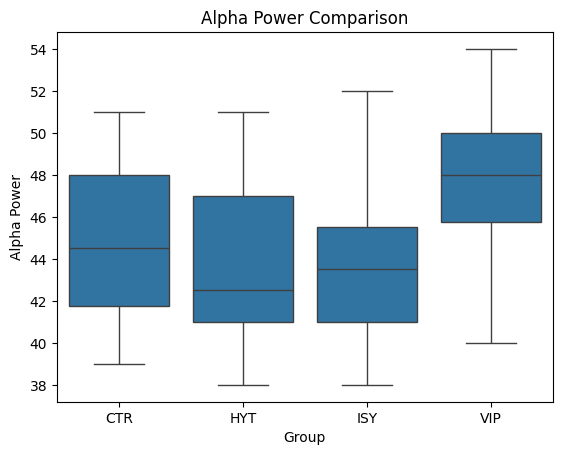

In [12]:
sns.boxplot(x='Group', y='Alpha', data=alpha_data)

plt.title('Alpha Power Comparison')
plt.xlabel('Group')
plt.ylabel('Alpha Power')
plt.show()

The median for the VIP group is higher than the median for the control group. This suggests that the central tendency of alpha power is higher in the VIP group.

Question 2) Examine the distribution of alpha and gamma power within each meditation group and the control group.

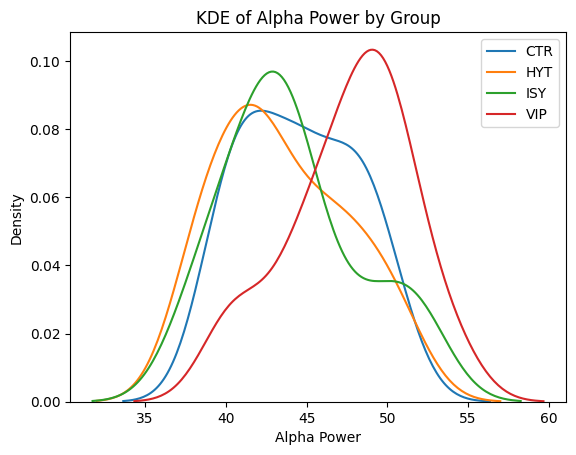

In [13]:
for group in alpha_data['Group'].unique():
    sns.kdeplot(alpha_data[alpha_data['Group'] == group]['Alpha'],label=group)

plt.title('KDE of Alpha Power by Group')
plt.xlabel('Alpha Power')
plt.ylabel('Density')
plt.legend()
plt.show()

VIP and ISY groups seem to exhibit the highest alpha power, while HYT has the lowest.

Distinct Peaks:  
CTR (blue) [43-44]  
HYT (orange) [39-40]  
ISY (green) [45-46]  
VIP (red) [50]

The broader distributions for VIP and ISY suggest more variability in these groups, while CTR and HYT show more consistency around their peaks.

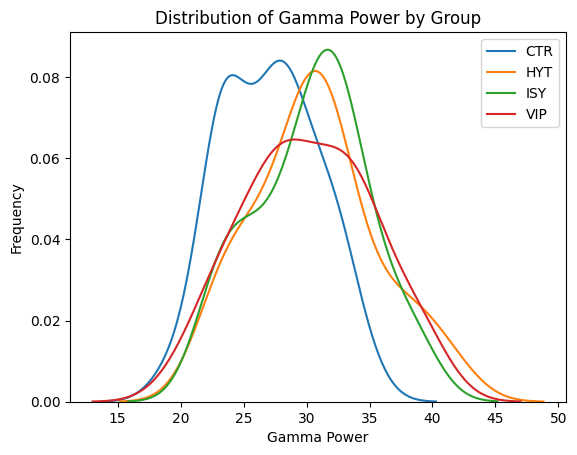

In [14]:
for group in gamma_data['Group'].unique():
    sns.kdeplot(gamma_data[gamma_data['Group'] == group]['Gamma_All'],label=group)

plt.title('Distribution of Gamma Power by Group')
plt.xlabel('Gamma Power')
plt.ylabel('Frequency')
plt.legend()
plt.show()

CTR seems to exhibit the most diverse range of gamma power.  
HYT, ISY, and VIP have more concentrated distributions, particularly around 30-34 gamma power.

Distinct Peaks:  
CTR (blue) [23 & 28]  
HYT (orange) [30]  
ISY (green) [32-33]  
VIP (red) [29]

Question 3) What is the relation between Frontal and Posterrior Readings

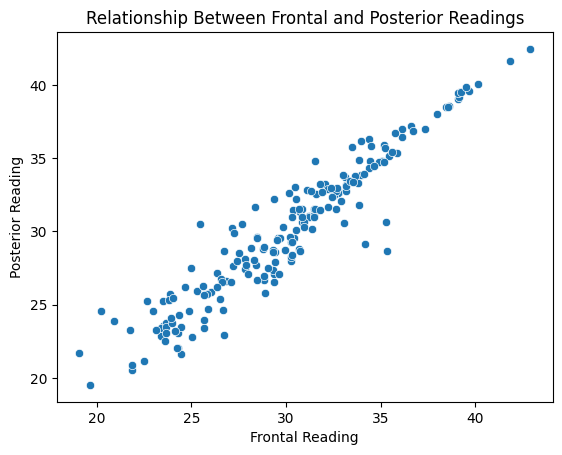

In [19]:
sns.scatterplot(x='Frontal', y='Posterior', data=gamma_data)
plt.xlabel('Frontal Reading')
plt.ylabel('Posterior Reading')
plt.title('Relationship Between Frontal and Posterior Readings')
plt.show()

Strong positive correlation between frontal and posterior readings.  
This means that as frontal readings increase, posterior readings tend to increase as well.

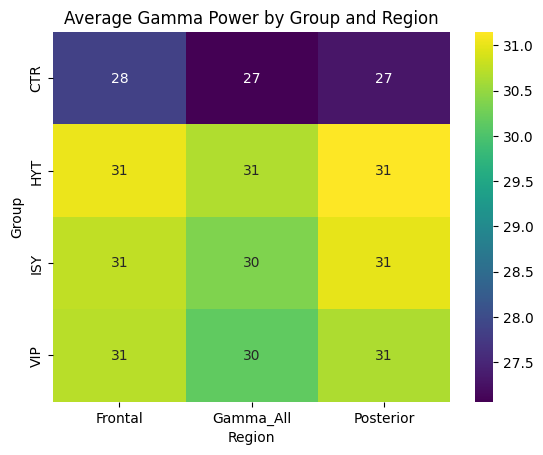

In [18]:
long_form = pd.melt(gamma_data, id_vars=['Group'], 
                    value_vars=['Gamma_All', 'Frontal', 'Posterior'], 
                    var_name='Region', value_name='Gamma_Power')
pivot_table = long_form.pivot_table(index='Group', columns='Region', values='Gamma_Power')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Average Gamma Power by Group and Region')

plt.show()

The Control (CTR) group has the lowest gamma power values across all regions  
HYT, ISY, and VIP Groups exhibit relatively consistent and higher gamma power values across all regions.